# Final exam - IST 652 - Notebook

Submitted by: 

Date: 

In [37]:
%matplotlib inline

import pandas as pd
import numpy as np
import requests
from io import StringIO
from io import BytesIO
from zipfile import ZipFile
import matplotlib.pyplot as plt 
np.set_printoptions(precision=4)
pd.options.display.max_rows = 20

!pip install plotly
import plotly.express as px 
import plotly.graph_objects as go
from plotly.subplots import make_subplots

     |████████████████████████████████| 25.3 MB 5.9 MB/s eta 0:00:01


# Loading data sets

## Bus ridership data sets

In [2]:
#Loading 2019 bus route SY36 dataset into Jupyter environment - a security warning will appear. You can ignore it.
#Be patient - it could take up to 2 minutes for the dataset to become available
urldata19="https://gitlab.gitlab.svc.cent-su.org/ccaicedo/652public/-/raw/master/datasets/busdata/BusActivity_SY36_2019.zip"
csvdata=requests.get(urldata19,verify=False).content

zf2019 = ZipFile(BytesIO(csvdata),'r')  #The dataset is being accessed from a zip file so this step is needed.

/opt/conda/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gitlab.gitlab.svc.cent-su.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [3]:
#Dataframe with bus activity data for 2019 for route SY36 is named data2019
data2019=pd.read_csv(zf2019.open("Preprocessed_SY36_2019.csv"))

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
#Loading 2020 bus route SY36 dataset into Jupyter environment - a security warning will appear. You can ignore it.
#Be patient - it could take up to 2 minutes for the dataset to become available
urldata20="https://gitlab.gitlab.svc.cent-su.org/ccaicedo/652public/-/raw/master/datasets/busdata/BusActivity_SY36_2020.zip"
csvdata=requests.get(urldata20,verify=False).content

zf2020 = ZipFile(BytesIO(csvdata),'r')  #The dataset is being accessed from a zip file so this step is needed.

/opt/conda/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gitlab.gitlab.svc.cent-su.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [5]:
#Dataframe with bus activity data for 2020 for route SY36 is named data2020
data2020=pd.read_csv(zf2020.open("Preprocessed_SY36_2020.csv"))

In [6]:
#Drop some columns that won't be needed
data2019.drop(['SURVEY_DATE','VEHICLE_DESCRIPTION','GARAGE_NAME','DIVISION_NAME','COMMENTS','WHEELCHAIRS','MODIFIED'],axis=1,inplace=True)
data2020.drop(['SURVEY_DATE','VEHICLE_DESCRIPTION','GARAGE_NAME','DIVISION_NAME','COMMENTS','WHEELCHAIRS','MODIFIED'],axis=1,inplace=True)

In [7]:
data2019.head()

,SERIAL_NUMBER,SCHEDULE_ID,SCHEDULE_NAME,PATTERN_ID,ROUTE_NUMBER,ROUTE_NAME,DIRECTION_NAME,BRANCH,TRIP_START_TIME,TIME_PERIOD,...,DWELL_TIME,RUNNING_TIME_ACTUAL,PASSENGERS_ON,PASSENGERS_OFF,PASSENGERS_IN,TIMEPOINT_MILES,FIRST_LAST_STOP,UNIQUE_ID,stop_lat,stop_lon
0,2604260,295,Sep18 (Holiday),180900591,371,SY36,FROM HUB,[Sy36]Outbound 136 no plazas,2019-01-01 07:40:00.000000,AM Peak,...,NaN,5.483,8,0,8,0.413,1,37100000002,43.043656,-76.150963
1,2604260,295,Sep18 (Holiday),180900591,371,SY36,FROM HUB,[Sy36]Outbound 136 no plazas,2019-01-01 07:40:00.000000,AM Peak,...,0.0,NaN,0,0,8,NaN,2,37100000003,43.044280,-76.147495
2,2604260,295,Sep18 (Holiday),180900591,371,SY36,FROM HUB,[Sy36]Outbound 136 no plazas,2019-01-01 07:40:00.000000,AM Peak,...,0.0,2.550,0,0,8,0.716,2,37100000005,43.045336,-76.147419
3,2604260,295,Sep18 (Holiday),180900591,371,SY36,FROM HUB,[Sy36]Outbound 136 no plazas,2019-01-01 07:40:00.000000,AM Peak,...,0.0,NaN,0,0,8,NaN,2,37100000006,43.047959,-76.147440
4,2604260,295,Sep18 (Holiday),180900591,371,SY36,FROM HUB,[Sy36]Outbound 136 no plazas,2019-01-01 07:40:00.000000,AM Peak,...,0.0,NaN,0,0,8,NaN,2,37100000007,43.049554,-76.148697


In [8]:
data2020.head()

,SERIAL_NUMBER,SCHEDULE_ID,SCHEDULE_NAME,PATTERN_ID,ROUTE_NUMBER,ROUTE_NAME,DIRECTION_NAME,BRANCH,TRIP_START_TIME,TIME_PERIOD,...,DWELL_TIME,RUNNING_TIME_ACTUAL,PASSENGERS_ON,PASSENGERS_OFF,PASSENGERS_IN,TIMEPOINT_MILES,FIRST_LAST_STOP,UNIQUE_ID,stop_lat,stop_lon
0,3286134,314,Dec19 (Holiday),191200591,371,SY36,FROM HUB,[sy36]Outbound 136 no plazas,2020-01-01 07:40:00.000000,AM Peak,...,NaN,5.533,9,0,9,0.417,1,37100000002,43.043656,-76.150963
1,3286134,314,Dec19 (Holiday),191200591,371,SY36,FROM HUB,[sy36]Outbound 136 no plazas,2020-01-01 07:40:00.000000,AM Peak,...,0.00,NaN,0,0,9,NaN,2,37100000003,43.044280,-76.147495
2,3286134,314,Dec19 (Holiday),191200591,371,SY36,FROM HUB,[sy36]Outbound 136 no plazas,2020-01-01 07:40:00.000000,AM Peak,...,0.00,4.200,0,0,9,0.705,2,37100000005,43.045336,-76.147419
3,3286134,314,Dec19 (Holiday),191200591,371,SY36,FROM HUB,[sy36]Outbound 136 no plazas,2020-01-01 07:40:00.000000,AM Peak,...,0.00,NaN,0,0,9,NaN,2,37100000006,43.047959,-76.147440
4,3286134,314,Dec19 (Holiday),191200591,371,SY36,FROM HUB,[sy36]Outbound 136 no plazas,2020-01-01 07:40:00.000000,AM Peak,...,0.12,NaN,1,0,10,NaN,2,37100000007,43.049554,-76.148697


In [9]:
data2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980551 entries, 0 to 980550
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SERIAL_NUMBER        980551 non-null  int64  
 1   SCHEDULE_ID          980551 non-null  int64  
 2   SCHEDULE_NAME        980551 non-null  object 
 3   PATTERN_ID           980551 non-null  int64  
 4   ROUTE_NUMBER         980551 non-null  int64  
 5   ROUTE_NAME           980551 non-null  object 
 6   DIRECTION_NAME       980551 non-null  object 
 7   BRANCH               980551 non-null  object 
 8   TRIP_START_TIME      980551 non-null  object 
 9   TIME_PERIOD          980551 non-null  object 
 10  SERVICE_PERIOD       980551 non-null  object 
 11  TRIP_NUMBER          980551 non-null  int64  
 12  TRIP_KEY             980551 non-null  int64  
 13  BLOCK_NUMBER         980551 non-null  int64  
 14  BLOCK_KEY            980551 non-null  int64  
 15  BLOCK_NAME       

In [10]:
data2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962566 entries, 0 to 962565
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SERIAL_NUMBER        962566 non-null  int64  
 1   SCHEDULE_ID          962566 non-null  int64  
 2   SCHEDULE_NAME        962566 non-null  object 
 3   PATTERN_ID           962566 non-null  int64  
 4   ROUTE_NUMBER         962566 non-null  int64  
 5   ROUTE_NAME           962566 non-null  object 
 6   DIRECTION_NAME       962566 non-null  object 
 7   BRANCH               962566 non-null  object 
 8   TRIP_START_TIME      962566 non-null  object 
 9   TIME_PERIOD          962566 non-null  object 
 10  SERVICE_PERIOD       962566 non-null  object 
 11  TRIP_NUMBER          962566 non-null  int64  
 12  TRIP_KEY             962566 non-null  int64  
 13  BLOCK_NUMBER         962566 non-null  int64  
 14  BLOCK_KEY            962566 non-null  int64  
 15  BLOCK_NAME       

## 2019 Syracuse weather data

In [11]:
#Loading Syracuse Weather dataset into Jupyter environment - a security warning will appear. You can ignore it.
url_weatherdata="https://gitlab.gitlab.svc.cent-su.org/ccaicedo/652public/-/raw/master/syracuse_2019_weather.csv"
csvweatherdata=requests.get(url_weatherdata,verify=False).text  #this will generate a warning but you can proceed

/opt/conda/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gitlab.gitlab.svc.cent-su.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [12]:
#Setup the weather_2019 dataframe with the data from the weather dataset 
#You still need to set the column that will be the index
weather_2019=pd.read_csv(StringIO(csvweatherdata))

In [13]:
weather_2019.head()

,STATION,NAME,DATE,AWND,PRCP,SNOW,TAVG,TMAX,TMIN
0,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",1/1/2019,15.66,0.02,0.0,40,53,21
1,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",1/2/2019,5.14,0.00,0.0,24,31,18
2,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",1/3/2019,10.74,0.09,0.3,33,37,30
3,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",1/4/2019,4.70,0.00,0.0,36,49,25
4,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",1/5/2019,5.59,0.00,0.0,33,44,25


# Exam task solutions

Add the text/code/visualizations for your exam tasks solutions from this point onwards. Use as many additional cells as required. Please place long textual explanations or analysis in their own markdown cells, not as comments inside your code cells.

### Task 1 (30 points): For the year of 2019, determine the number of passengers that board thebus (PASSENGERS_ON) at a particular STOP_ID per day. Use this data to understand how the changes in weather affect the ridership at your selected Bus Stop. Select a bus stop with a daily annual average of at least 5 passengers using it (This means that for any service day of the year, on average, at least 5 passengers boarded the bus from that bus stop). 
 

In [14]:
## converting the object TRIP_START_TIME into datetime.
data2019['TRIP_START_TIME'] = pd.to_datetime(data2019['TRIP_START_TIME'])


In [15]:
data2019['TRIP_START_TIME_YYYY_DD_MM'] = data2019['TRIP_START_TIME'].dt.date
data2019['TRIP_START_TIME_YYYY_DD_MM'] = pd.to_datetime(data2019['TRIP_START_TIME_YYYY_DD_MM'])

In [24]:
## Number of passengers boarding at all stop ids per day
cols = ['TRIP_START_TIME_YYYY_DD_MM', 'STOP_ID']
df_pass_count = data2019.groupby(cols)[["PASSENGERS_ON"]].sum()
df_pass_count.head(1000)

PASSENGERS_ON
TRIP_START_TIME_YYYY_DD_MM STOP_ID               
2019-01-01                 100                  0
                           611                  8
                           612                  6
                           619                  0
                           621                  0
...                                           ...
2019-01-07                 740                  1
                           747                  0
                           750                  0
                           751                  1
                           757                  0

[1000 rows x 1 columns]

In [88]:
df_particular_14615_passengers = data2019.loc[(data2019['STOP_ID'] == 14615) & (data2019['PASSENGERS_ON'] >= 0)]
df_particular_14615_passengers_1 = df_particular_14615_passengers.groupby(cols)[["PASSENGERS_ON"]].sum()
df_particular_14615_passengers_1

,,PASSENGERS_ON
TRIP_START_TIME_YYYY_DD_MM,STOP_ID,
2019-01-01,14615,0
2019-01-02,14615,1
2019-01-03,14615,4
2019-01-04,14615,1
2019-01-05,14615,1
...,...,...
2019-12-27,14615,5
2019-12-28,14615,1
2019-12-29,14615,0


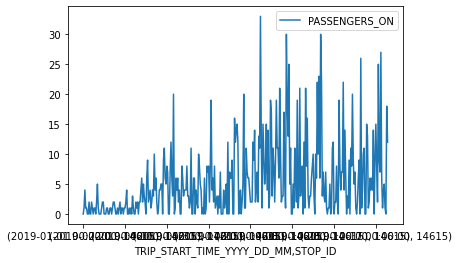

In [89]:
df_particular_stop_id_passengers_1.plot.line()
plt.show()

In [90]:
# monthly
df_particular_stop_id_passengers_m = df_particular_stop_id_passengers.groupby(pd.Grouper(freq='M', key='TRIP_START_TIME_YYYY_DD_MM')).mean()
# daily
davg_df2 = df_particular_stop_id_passengers.groupby(pd.Grouper(freq='D', key='TRIP_START_TIME_YYYY_DD_MM')).mean()
df_gt3 = davg_df2.loc[(davg_df2['PASSENGERS_ON'] > 3) ]
df_gt3['STOP_ID']

TRIP_START_TIME_YYYY_DD_MM
2019-09-01    14615.0
2019-10-12    14615.0
Freq: 41D, Name: STOP_ID, dtype: float64

In [91]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=df_particular_stop_id_passengers.TRIP_START_TIME_YYYY_DD_MM, y=df_particular_stop_id_passengers["PASSENGERS_ON"],
                    mode='lines',
                    name=' Passenger count for stop id 14615'))
fig.update_layout(title=" Passenger count for stop id 14615",
                 xaxis_title="Date",yaxis_title=" Passenger count for stop id 14615",legend=dict(x=0,y=1,traceorder="normal"))

fig.show()

In [109]:
#how the changes in weather affect the ridership at your selected Bus Stop
weather_2019['DATE'] = pd.to_datetime(weather_2019['DATE'])
weather_2019['DATE_dd'] = weather_2019['DATE'].dt.date


#finding average temperature monthly

DATE_dd = weather_2019['DATE_dd']
df1 = weather_2019.groupby(DATE_dd)['TAVG'].mean()


df1.index


Index([2019-01-01, 2019-01-02, 2019-01-03, 2019-01-04, 2019-01-05, 2019-01-06,
       2019-01-07, 2019-01-08, 2019-01-09, 2019-01-10,
       ...
       2019-12-22, 2019-12-23, 2019-12-24, 2019-12-25, 2019-12-26, 2019-12-27,
       2019-12-28, 2019-12-29, 2019-12-30, 2019-12-31],
      dtype='object', name='DATE_dd', length=365)

In [113]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=df_particular_stop_id_passengers.TRIP_START_TIME_YYYY_DD_MM, y=df_particular_stop_id_passengers["PASSENGERS_ON"],
                    mode='lines',
                    name='Passenger count for stop id 14615'))
fig.add_trace(go.Scatter(x=df1.index, y=df1,mode='lines',
                    name=' Temperature AVG'))
fig.update_layout(title=" Temperature vs Passenger count for stop id 14615",
                 xaxis_title="Date",yaxis_title=" Temperature vs Passenger count for stop id 14615",legend=dict(x=0,y=1,traceorder="normal"))

fig.show()

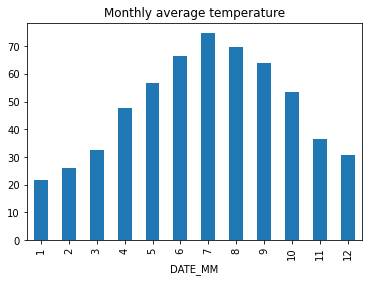

In [99]:
#how the changes in weather affect the ridership at your selected Bus Stop
weather_2019['DATE'] = pd.to_datetime(weather_2019['DATE'])
weather_2019['DATE_MM'] = weather_2019['DATE'].dt.month


#finding average temperature monthly

DATE_MM = weather_2019['DATE_MM']
df1 = weather_2019.groupby(DATE_MM)['TAVG'].mean()


df1.plot.bar()
plt.title("Monthly average temperature")
plt.show()


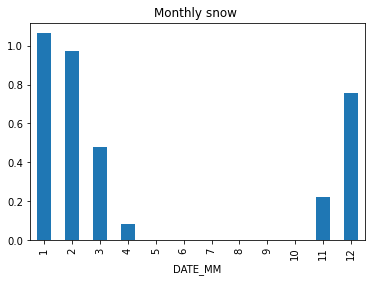

In [93]:
#finding average Snow monthly
DATE_MM = weather_2019['DATE_MM']
df2 = weather_2019.groupby(DATE_MM)['SNOW'].mean()

df2.plot.bar()
plt.title("Monthly snow ")
plt.show()


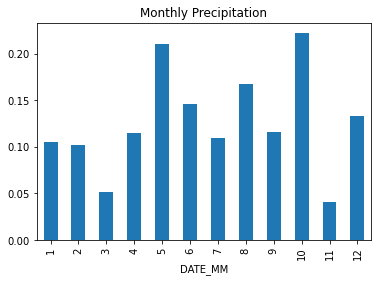

In [94]:
#finding average precipitation monthly
DATE_MM = weather_2019['DATE_MM']
df2 = weather_2019.groupby(DATE_MM)['PRCP'].mean()

df2.plot.bar()
plt.title("Monthly Precipitation")
plt.show()

### Weather and ridership relationship

#### From the above analysis it is clear that, as the temperature decreases the bus ridership decreases. In january to march where the temperature was lowest, the bus ridership was the least.

#### As the snow increases, the bus ridership decreases. In the month of January to march where snow is maximum the bus ridership at 14615 is the least.

#### Also, one fact to consider is that the winter break might have also affected the bus ridership as many of the people go on holidays.


### Subtask 1.1 (+10 points): Group the activity at the selected bus stop per month and compare against the average temperature for that month 

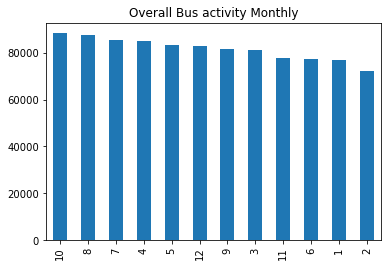

In [118]:
## Overall Bus activity Monthly

data2019['Date_MM'] = data2019['TRIP_START_TIME_YYYY_DD_MM'].dt.month
month_count = data2019['Date_MM'].value_counts()
month_count.plot.bar()
plt.title("Overall Bus activity Monthly")
plt.show()



In [119]:
## Number of passengers boarding at all stop ids per day Monthly
cols = ['Date_MM', 'STOP_ID']
df_pass_count_monthly = data2019.groupby(cols)[["PASSENGERS_ON"]].sum()
df_pass_count_monthly

PASSENGERS_ON
Date_MM STOP_ID               
1       100                 11
        611                398
        612                295
        619                 10
        621                 40
...                        ...
12      17661             5264
        17676              146
        17677              311
        17823               39
        17824                6

[1933 rows x 1 columns]

In [120]:
df_particular_14615_passengers_monthly = data2019.loc[(data2019['STOP_ID'] == 14615) & (data2019['PASSENGERS_ON'] >= 0)]
df_particular_14615_passengers_monthly_1 = df_particular_14615_passengers_monthly.groupby(cols)[["PASSENGERS_ON"]].sum()
df_particular_14615_passengers_monthly_1

,,PASSENGERS_ON
Date_MM,STOP_ID,
1,14615,29
2,14615,24
3,14615,91
4,14615,150
5,14615,120
6,14615,118
7,14615,217
8,14615,299
9,14615,257


In [128]:
df_particular_14615_passengers_monthly.columns

Index(['SERIAL_NUMBER', 'SCHEDULE_ID', 'SCHEDULE_NAME', 'PATTERN_ID',
       'ROUTE_NUMBER', 'ROUTE_NAME', 'DIRECTION_NAME', 'BRANCH',
       'TRIP_START_TIME', 'TIME_PERIOD', 'SERVICE_PERIOD', 'TRIP_NUMBER',
       'TRIP_KEY', 'BLOCK_NUMBER', 'BLOCK_KEY', 'BLOCK_NAME', 'RUN_NUMBER',
       'RUN_KEY', 'VEHICLE_NUMBER', 'VEHICLE_SEATS', 'OPERATOR_ID',
       'SORT_ORDER', 'STOP_ID', 'MAIN_CROSS_STREET', 'TRAVEL_DIRECTION',
       'TIMEPOINT', 'SEGMENT_MILES', 'TIME_SCHEDULED', 'TIME_ACTUAL_ARRIVE',
       'TIME_ACTUAL_DEPART', 'DWELL_TIME', 'RUNNING_TIME_ACTUAL',
       'PASSENGERS_ON', 'PASSENGERS_OFF', 'PASSENGERS_IN', 'TIMEPOINT_MILES',
       'FIRST_LAST_STOP', 'UNIQUE_ID', 'stop_lat', 'stop_lon',
       'TRIP_START_TIME_YYYY_DD_MM', 'TRIP_START_TIME_MM', 'Date_MM'],
      dtype='object')

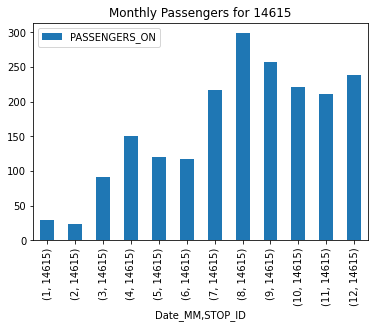

In [122]:
df_particular_14615_passengers_monthly_1.plot.bar()
plt.title("Monthly Passengers for 14615")
plt.show()


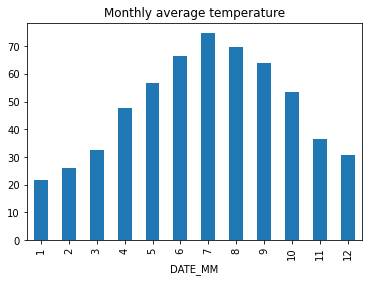

In [124]:
#how the changes in weather affect the ridership at your selected Bus Stop
weather_2019['DATE'] = pd.to_datetime(weather_2019['DATE'])
weather_2019['DATE_MM'] = weather_2019['DATE'].dt.month


#finding average temperature monthly

DATE_MM = weather_2019['DATE_MM']
df1 = weather_2019.groupby(DATE_MM)['TAVG'].mean()


df1.plot.bar()
plt.title("Monthly average temperature")
plt.show()


In [134]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=df1.index, y=df_particular_14615_passengers_monthly_1["PASSENGERS_ON"],
                    mode='lines',
                    name='Passenger count for stop id 14615'))
fig.add_trace(go.Scatter(x=df1.index, y=df1,mode='lines',
                    name=' Temperature AVG in fahrenheit'))
fig.update_layout(title=" Temperature in fahrenheit vs Passenger count for stop id 14615",
                 xaxis_title="Month of the year",yaxis_title=" Temperature vs Passenger count for stop id 14615",legend=dict(x=0,y=1,traceorder="normal"))

fig.show()

### as the temperature decreases, Passenger count also decreases and vice versa

### Subtask 1.2 (+10 points): Compare the activity between 2 or more bus stops over each month of the year 

In [136]:
df_particular_14615_passengers_monthly_14615 = data2019.loc[(data2019['STOP_ID'] == 14615) & (data2019['PASSENGERS_ON'] >= 0)]
df_particular_14615_passengers_monthly_14615_1 = df_particular_14615_passengers_monthly_14615.groupby(cols)[["PASSENGERS_ON"]].sum()
df_particular_14615_passengers_monthly_14615_1

,,PASSENGERS_ON
Date_MM,STOP_ID,
1,14615,29
2,14615,24
3,14615,91
4,14615,150
5,14615,120
6,14615,118
7,14615,217
8,14615,299
9,14615,257


In [138]:
df_particular_passengers_monthly_17661 = data2019.loc[(data2019['STOP_ID'] == 17661) & (data2019['PASSENGERS_ON'] >= 0)]
df_particular_passengers_monthly_17661_1 = df_particular_passengers_monthly_17661.groupby(cols)[["PASSENGERS_ON"]].sum()
df_particular_passengers_monthly_17661_1

,,PASSENGERS_ON
Date_MM,STOP_ID,
1,17661,4264
2,17661,4111
3,17661,4876
4,17661,5284
5,17661,5078
6,17661,4498
7,17661,5068
8,17661,5735
9,17661,5901


In [142]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=df1.index, y=df_particular_14615_passengers_monthly_14615_1["PASSENGERS_ON"],
                    mode='lines',
                    name='Passenger count for stop id 14615'))
fig.add_trace(go.Scatter(x=df1.index, y=df_particular_passengers_monthly_17661_1["PASSENGERS_ON"],mode='lines',
                    name='Passenger count for stop id 17661'))
fig.update_layout(title=" Passenger count for stop id 17661 vs Passenger count for stop id 14615",
                 xaxis_title="Month of the year",yaxis_title="  Passenger count for stop id 17661 vs 14615",legend=dict(x=0,y=1,traceorder="normal"))

fig.show()

### Subtask 1.3 (+10 points): Determine the 5 bus stops that provide the highest average number of daily passengers during the year 

In [163]:
## Top 5 bus stops with highest average daily passengers
cols = ['TRIP_START_TIME_YYYY_DD_MM', 'STOP_ID']
df_pass_count = data2019.groupby(cols)[["PASSENGERS_ON"]].mean()
means = data2019.groupby('STOP_ID').mean()
df_pass_count.nlargest(10000,'PASSENGERS_ON')

PASSENGERS_ON
TRIP_START_TIME_YYYY_DD_MM STOP_ID               
2019-01-01                 100               0.00
                           611               1.00
                           612               0.75
                           619               0.00
                           621               0.00
...                                           ...
2020-01-01                 12669             0.00
                           14616             0.00
                           14645             0.00
                           17661             1.00
                           17824             0.00

[58191 rows x 1 columns]

### 5 bus stops that provide the highest average number of daily passengers during the year are 3761, 1114, 17661, 14616, 14615 